# Results
Most carriers are only accepting offers 1 day out of 28. This first histogram is not close to representing our qualitative hypothesis. Our qualitative hypothesis is 1 accepted offer per carrier/per week/per driver). So our max value should be around 4.
### 1. Are we looking at the wrong users? 
Can we filter this user group in a way that more represents the persona of our qualitative hypothesis? We got our accpeted offers by carriers from the STMS database...Are their offers being accpeted by carriers that would not show up in the STMS database? How many carriers actually received an offer?
### 2. Are we not solving our users problem?  Are they using alternatives?

# Results
Most carriers are only accepting offers 1 day out of 28. This histogram is still not close to representing our qualitative hypothesis. Our qualitative hypothesis is 1 accepted offer per carrier/per week/per driver. So our max value should be at least be 4
### 1. Are we looking at the wrong users? 
Can we filter this user group in a way that more represents the persona of our qualitative hypothesis? We got our accpeted offers by carriers from the STMS database...Are their offers being accpeted by carriers that would not show up in the STMS database?
### 2. Are we not solving our users problem?  Are they using alternatives?

# Next steps
We need to get a better representation of offers accpeted per driver. So now I want to look at the number of offers accepted in the last 28 days for each carrier for each specific driver.

In [144]:
# Creating a table of shipper offers
sql = '''
SELECT carrier_name, carrier_guid, id, order_id, guid, date(accepted_date), carrier_order_guid 
FROM stms_db2_shipper.offers
WHERE status IN ('paid', 'delivered', 'accepted', 'picked_up', 'invoiced')
AND accepted_date >= date(current_date - interval '28 days')
AND accepted_date < date(current_date)
'''
shipper_offers = pd.read_sql_query(sql, con=engine)
shipper_offers = shipper_offers.rename(columns={'date': 'accepted_date'})
shipper_offers.head()

,carrier_name,carrier_guid,id,order_id,guid,accepted_date,carrier_order_guid
0,AIA TRUCKING LLC,ebb7b02d-be08-473d-bbfe-6e9ac15d6ae6,509304,1062331,93c14a14-6654-4d76-aeb2-3837815f57dc,2020-12-15,None
1,COASTAL TRUCKING LLC,ec8b6cfd-62f8-4da5-9185-890189917b8c,509832,1039582,9dd7da29-516e-499d-be88-bd210718b505,2020-12-15,None
2,Hooper Custom Transport LLC,1f6662f4-2b9f-4c24-9c9c-828b90bcf948,509982,1062546,f62ed81a-9824-4424-966b-abeb640b9f61,2020-12-15,None
3,Taurus Auto Group Inc.,df241771-9e7b-4f73-94e3-7bd45b51ec38,510078,1034724,31f6db24-5b90-4bac-a428-e7ea75112f63,2020-12-15,None
4,DW LOGISTICS LLC,f781b01e-a607-48e0-b98a-0829ba14d759,510132,1063406,456ae852-4b34-4ffa-97af-ce6051146146,2020-12-15,None


In [145]:
# Checking for missing values
shipper_offers.isna().sum()/shipper_offers.isna().count()

carrier_name          0.000000
carrier_guid          0.000063
id                    0.000000
order_id              0.000000
guid                  0.000000
accepted_date         0.000000
carrier_order_guid    0.913400
dtype: float64

The number of missing values is high for carrier_order_guid. I will join this 'shipping offers' table with the 'shipping orders' table to fill in these missing values.

In [146]:
# creating a shipping orders table
sql = '''
SELECT id, active_offer_id, guid, carrier_order_guid 
FROM stms_db2_shipper.orders
'''
shipper_orders = pd.read_sql_query(sql, con=engine)
shipper_orders.head()

,id,active_offer_id,guid,carrier_order_guid
0,945418,384157.0,2fa61eef-a8fa-4ebb-a82c-8037fb082cea,e78b0230-7642-462a-9be8-61ce0dd14050
1,945458,390119.0,709543ec-1051-497f-b4b8-845c6dafcc14,7adcb207-2107-401a-872e-d37755ad1900
2,945498,386140.0,684fbb74-0879-43d5-8d80-4db2059f4d9b,25d5412d-6999-4751-94ed-8275f555db08
3,945538,382932.0,de8a4b2b-6c95-43a1-8ae0-98537574c9cf,0aa77634-d1db-4543-aa0a-dcdb9ef90039
4,945578,383436.0,1e710b45-5d09-4b37-b206-4efa84c2215a,b1bf3099-d852-41d2-a7c7-984e68131e3c


In [147]:
# Joining 'shipper_orders' table with 'shipper_offers' table
shipper_offers_join1 = shipper_offers.merge(shipper_orders, how='left', left_on='id', right_on='active_offer_id',
                                      suffixes=('_shipper_offer_table', '_shipper_order_table'))
shipper_offers_join1.head()

,carrier_name,carrier_guid,id_shipper_offer_table,order_id,guid_shipper_offer_table,accepted_date,carrier_order_guid_shipper_offer_table,id_shipper_order_table,active_offer_id,guid_shipper_order_table,carrier_order_guid_shipper_order_table
0,AIA TRUCKING LLC,ebb7b02d-be08-473d-bbfe-6e9ac15d6ae6,509304,1062331,93c14a14-6654-4d76-aeb2-3837815f57dc,2020-12-15,None,1062331.0,509304.0,63f94b4f-3928-47aa-89a7-80b42fa7a262,97602e07-b036-4bd8-bcd8-4b28821eac98
1,COASTAL TRUCKING LLC,ec8b6cfd-62f8-4da5-9185-890189917b8c,509832,1039582,9dd7da29-516e-499d-be88-bd210718b505,2020-12-15,None,1039582.0,509832.0,b600df5e-84ff-468d-98f4-6ddf6969b450,141be196-6869-4166-88a2-451061116cc4
2,Hooper Custom Transport LLC,1f6662f4-2b9f-4c24-9c9c-828b90bcf948,509982,1062546,f62ed81a-9824-4424-966b-abeb640b9f61,2020-12-15,None,1062546.0,509982.0,1441899c-ff86-44b4-8bde-f94385b08762,50d42308-bcce-4e45-93dd-d29bfb2808a9
3,Taurus Auto Group Inc.,df241771-9e7b-4f73-94e3-7bd45b51ec38,510078,1034724,31f6db24-5b90-4bac-a428-e7ea75112f63,2020-12-15,None,1034724.0,510078.0,d01fe490-43d7-4433-86fb-4ec36dca8dec,973dbf95-26cb-437f-9332-42a88ca07f37
4,DW LOGISTICS LLC,f781b01e-a607-48e0-b98a-0829ba14d759,510132,1063406,456ae852-4b34-4ffa-97af-ce6051146146,2020-12-15,None,1063406.0,510132.0,4fa14c6b-30e6-494a-b0d7-46557aef2ce4,9ae0652b-0316-4d43-99a3-faff45342359


In [148]:
# checking for missing values again
shipper_offers_join1.isna().sum()/shipper_offers_join1.isna().count()

carrier_name                              0.000000
carrier_guid                              0.000063
id_shipper_offer_table                    0.000000
order_id                                  0.000000
guid_shipper_offer_table                  0.000000
accepted_date                             0.000000
carrier_order_guid_shipper_offer_table    0.913400
id_shipper_order_table                    0.000157
active_offer_id                           0.000157
guid_shipper_order_table                  0.000157
carrier_order_guid_shipper_order_table    0.011771
dtype: float64

After joining the tables the missing values for carrier_order_guid decreased to less than 2% of the rows.

In [149]:
# creating a table for carrier orders
sql = '''
SELECT driver_id, carrier_id, guid, id
FROM ctms_db_public.msd_order
'''
carrier_orders = pd.read_sql_query(sql, con=engine)
carrier_orders.head()

,driver_id,carrier_id,guid,id
0,10348.0,5749.0,ca3c41b4-b420-4572-89ee-c677a7d9657a,2084621
1,31549.0,21925.0,a8a4e40c-883b-4173-836c-ccdbc90cb4c7,2086029
2,28928.0,20467.0,91097df9-5619-4cc0-816b-e13dbf383c95,2087437
3,32119.0,6540.0,a1fef6f1-0503-4095-9920-c1652ad5a517,2088845
4,5780.0,2828.0,94fdb82d-5c3d-4005-abee-b147735c2854,2090253


In [150]:
# joining carrier orders table with shipper offers table
carrier_orders_join = shipper_offers_join1.merge(carrier_orders,
                                                 left_on='carrier_order_guid_shipper_order_table', right_on='guid',
                                                 suffixes=('_shipper_offer', '_shipper_order'))

carrier_orders_join

,carrier_name,carrier_guid,id_shipper_offer_table,order_id,guid_shipper_offer_table,accepted_date,carrier_order_guid_shipper_offer_table,id_shipper_order_table,active_offer_id,guid_shipper_order_table,carrier_order_guid_shipper_order_table,driver_id,carrier_id,guid,id
0,AIA TRUCKING LLC,ebb7b02d-be08-473d-bbfe-6e9ac15d6ae6,509304,1062331,93c14a14-6654-4d76-aeb2-3837815f57dc,2020-12-15,None,1062331.0,509304.0,63f94b4f-3928-47aa-89a7-80b42fa7a262,97602e07-b036-4bd8-bcd8-4b28821eac98,68120.0,37643.0,97602e07-b036-4bd8-bcd8-4b28821eac98,7781619
1,COASTAL TRUCKING LLC,ec8b6cfd-62f8-4da5-9185-890189917b8c,509832,1039582,9dd7da29-516e-499d-be88-bd210718b505,2020-12-15,None,1039582.0,509832.0,b600df5e-84ff-468d-98f4-6ddf6969b450,141be196-6869-4166-88a2-451061116cc4,35751.0,24119.0,141be196-6869-4166-88a2-451061116cc4,7784406
2,Hooper Custom Transport LLC,1f6662f4-2b9f-4c24-9c9c-828b90bcf948,509982,1062546,f62ed81a-9824-4424-966b-abeb640b9f61,2020-12-15,None,1062546.0,509982.0,1441899c-ff86-44b4-8bde-f94385b08762,50d42308-bcce-4e45-93dd-d29bfb2808a9,31834.0,22063.0,50d42308-bcce-4e45-93dd-d29bfb2808a9,7785020
3,Taurus Auto Group Inc.,df241771-9e7b-4f73-94e3-7bd45b51ec38,510078,1034724,31f6db24-5b90-4bac-a428-e7ea75112f63,2020-12-15,None,1034724.0,510078.0,d01fe490-43d7-4433-86fb-4ec36dca8dec,973dbf95-26cb-437f-9332-42a88ca07f37,72910.0,6323.0,973dbf95-26cb-437f-9332-42a88ca07f37,7785734
4,DW LOGISTICS LLC,f781b01e-a607-48e0-b98a-0829ba14d759,510132,1063406,456ae852-4b34-4ffa-97af-ce6051146146,2020-12-15,None,1063406.0,510132.0,4fa14c6b-30e6-494a-b0d7-46557aef2ce4,9ae0652b-0316-4d43-99a3-faff45342359,69281.0,35837.0,9ae0652b-0316-4d43-99a3-faff45342359,7786235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31474,2X TRANSPORTATION LLC,bcbd3c6d-04a8-457e-bec2-0a75c118f62a,547901,1094048,bc476445-0018-4a7a-a9d9-fd91ea88eaa6,2021-01-11,None,1094048.0,547901.0,1d247a01-bc84-4ba9-8594-e481486c67bb,17d18654-1e78-4747-a2be-fb9170cd88db,55261.0,33913.0,17d18654-1e78-4747-a2be-fb9170cd88db,7966330
31475,LEGIT AUTO TRANSPORT LLC,490da820-c409-48e1-be53-bcb6c1fd1093,548047,1102642,e9be3e4e-75e2-435f-8cd8-ba3323b38b1c,2021-01-11,None,1102642.0,548047.0,8b204602-4894-4103-bb64-a37867c14277,72bd40fa-b511-4330-8436-877348d2c11e,39835.0,26253.0,72bd40fa-b511-4330-8436-877348d2c11e,7967178
31476,AVM LOGISTICS GROUP LLC,ce5e744d-5312-46cb-b225-932d31cee91f,548142,1102698,a574e8d3-f0f8-4668-a793-af77fa52cdc1,2021-01-11,None,1102698.0,548142.0,dcc0a961-cc81-4df4-b3de-693ab317fd24,5ee987a5-5825-4b51-8f27-5ecfa9238bd9,68421.0,36723.0,5ee987a5-5825-4b51-8f27-5ecfa9238bd9,7967706
31477,AFL ENTERPRISES LLC,979fc65a-c225-4e8b-8338-71820bb53b32,548239,1098711,fa2df49e-f5df-4e3f-a2fa-a4a5069ae48b,2021-01-11,None,1098711.0,548239.0,e315eda9-6149-4916-8d97-800f0c354024,01a74c75-4178-42ef-b33c-399cf65f4f27,68526.0,38405.0,01a74c75-4178-42ef-b33c-399cf65f4f27,7968313


In [151]:
# joining driver info with the carrier orders table
carrier_orders_with_driver = carrier_orders_join.merge(drivers,
                                                  left_on=['driver_id', 'carrier_guid'],
                                                  right_on=['genericuser_ptr_id', 'carrier_guid'])
carrier_orders_with_driver

,carrier_name,carrier_guid,id_shipper_offer_table,order_id,guid_shipper_offer_table,accepted_date,carrier_order_guid_shipper_offer_table,id_shipper_order_table,active_offer_id,guid_shipper_order_table,carrier_order_guid_shipper_order_table,driver_id,carrier_id_x,guid,id,genericuser_ptr_id,carrier_id_y,driver_guid,name
0,AIA TRUCKING LLC,ebb7b02d-be08-473d-bbfe-6e9ac15d6ae6,509304,1062331,93c14a14-6654-4d76-aeb2-3837815f57dc,2020-12-15,None,1062331.0,509304.0,63f94b4f-3928-47aa-89a7-80b42fa7a262,97602e07-b036-4bd8-bcd8-4b28821eac98,68120.0,37643.0,97602e07-b036-4bd8-bcd8-4b28821eac98,7781619,68120,37643,02ebf3ea-a786-47b7-9a2a-dccbc8ac2ceb,AIA TRUCKING LLC
1,AIA TRUCKING LLC,ebb7b02d-be08-473d-bbfe-6e9ac15d6ae6,509303,1062328,7ee0849b-442c-4c65-8e50-29b898f5029e,2020-12-15,None,1062328.0,509303.0,de5b43db-713e-40fd-8d9e-6132c1917ac4,deb9f9ba-64b4-4983-bec1-48b5d606895f,68120.0,37643.0,deb9f9ba-64b4-4983-bec1-48b5d606895f,7781620,68120,37643,02ebf3ea-a786-47b7-9a2a-dccbc8ac2ceb,AIA TRUCKING LLC
2,AIA TRUCKING LLC,ebb7b02d-be08-473d-bbfe-6e9ac15d6ae6,534554,1079662,1fa9ba0f-8e7d-4e4b-8094-1d2ad01573cc,2020-12-31,None,1079662.0,534554.0,98cabf4b-e732-4db0-becb-73a4b06d8ec9,9a64b445-5090-4fe2-a650-6a3050b95758,68120.0,37643.0,9a64b445-5090-4fe2-a650-6a3050b95758,7894388,68120,37643,02ebf3ea-a786-47b7-9a2a-dccbc8ac2ceb,AIA TRUCKING LLC
3,AIA TRUCKING LLC,ebb7b02d-be08-473d-bbfe-6e9ac15d6ae6,537929,1087633,e3c6060a-950f-42cf-be66-3a7c52026a92,2021-01-04,None,1087633.0,537929.0,00a76364-5769-44b0-86a6-444aee96de0a,e3e1a4eb-90ab-4902-aace-0f26d5baab26,68120.0,37643.0,e3e1a4eb-90ab-4902-aace-0f26d5baab26,7911681,68120,37643,02ebf3ea-a786-47b7-9a2a-dccbc8ac2ceb,AIA TRUCKING LLC
4,AIA TRUCKING LLC,ebb7b02d-be08-473d-bbfe-6e9ac15d6ae6,534555,1081824,200318fe-c8e8-410a-ba38-80221829781f,2020-12-31,None,1081824.0,534555.0,dbe57eb8-8f96-45ab-a273-42bdf2f37615,042b56f1-0099-49bc-b2d0-5aadaa4f323e,68120.0,37643.0,042b56f1-0099-49bc-b2d0-5aadaa4f323e,7894389,68120,37643,02ebf3ea-a786-47b7-9a2a-dccbc8ac2ceb,AIA TRUCKING LLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27492,LOYALTY AUTO TRANSPORT LLC,769003c5-5879-4ca0-b4b2-3356abecb936,546868,1085293,a68a9996-c83a-4b06-89f1-109b31a398b2,2021-01-11,None,1085293.0,546868.0,e8cb8d56-9810-41b4-9dbc-db3d3c184cac,ac87b1e1-186d-4d87-9963-a6c89bbec0da,24374.0,17231.0,ac87b1e1-186d-4d87-9963-a6c89bbec0da,7961351,24374,17231,ccec1991-b1a7-42d5-8ee2-4b0c91b0d61a,LOYALTY AUTO TRANSPORT LLC
27493,Quintana's Towing LLC,297c0e7a-2f8c-48b3-a9fc-edc9668b149f,547195,1091960,9bbda1f3-022a-4fc7-a75d-f6fda9f36cb4,2021-01-11,None,1091960.0,547195.0,71fe2e16-0db7-4486-bc72-aed650cac8cd,a713cb5e-ea54-4102-837b-60cecfcffcc0,84652.0,7095.0,a713cb5e-ea54-4102-837b-60cecfcffcc0,7962932,84652,7095,bcb46172-4b18-4992-acf5-2456c7c48d4e,Quintana's Towing LLC
27494,ASTRA LINES INC,a6ffdd95-3bbd-43f8-a9a1-e38d18b17c2b,547534,1101915,eedbf00e-dcb1-4324-b0b6-a976f23bc3bb,2021-01-11,None,1101915.0,547534.0,9b27fc8e-b801-45ed-ad8a-61e0d447ab06,58248e98-ef7b-4ff5-9b11-1c7829a75414,77123.0,41179.0,58248e98-ef7b-4ff5-9b11-1c7829a75414,7964235,77123,41179,b14d35b6-30b8-4aff-83d7-a61997f3167f,ASTRA LINES INC
27495,TAD LOGISTIC LLC,e8d20ea3-c4bc-463d-a313-174d1ab0c383,547691,1085774,3256ac34-1b6d-4e82-84bb-1c5b7db82485,2021-01-11,82e10442-de0c-49f0-81a6-27d2cad43298,1085774.0,547691.0,e095b9a8-5e86-42f1-8d2f-85b8a4521081,82e10442-de0c-49f0-81a6-27d2cad43298,79644.0,38294.0,82e10442-de0c-49f0-81a6-27d2cad43298,7965024,79644,38294,97266ad8-460b-4847-968b-4e50e565c4d2,TAD LOGISTIC LLC


All missing values in useful columns have been handled.

In [152]:
# Getting the unique number of accepted offers by grouping driver and carrier information
result_2 = (carrier_orders_with_driver.groupby(['driver_id', 'driver_guid', 'carrier_name', 'carrier_guid'])
                                              [['accepted_date']].nunique())
result_2.reset_index(inplace=True)
result_2 = result_2.rename(columns={'accepted_date': 'unique_days_accepting_offers'})
result_2

,driver_id,driver_guid,carrier_name,carrier_guid,unique_days_accepting_offers
0,260.0,3f0a1f39-6719-45f4-87f5-59fe4c7d186f,KC Auto Transport,dc44c34d-0ebc-422a-8d21-f2a76eeda9d4,1
1,428.0,c5bf4b94-0b5a-4d6c-a6be-603ee1f215a4,BRT Auto Transport LLC,dff9819a-c1c3-4520-bf8a-ecd23171bd82,2
2,634.0,787b5d1f-2f7e-438c-89d2-d3c3e90d6e06,Stein Auto Transport Llc,c2774871-0eff-4c1c-a3e7-e32ca7c2b3f8,1
3,789.0,57a3e202-1bc7-4980-b317-2e40d108cd62,Palidin Enterprises LLC,d87b57d0-2fff-4685-942c-d85ab7aafabe,2
4,925.0,75f1e441-c3f2-4c22-be1f-a7bac629c21b,Star Express inc,bd5d044b-4055-457e-964a-e1a89c2427c8,1
...,...,...,...,...,...
3872,84964.0,0f08028c-9f8f-4da0-b514-abea96685381,C J HAULING LLC,41fe2ef5-bcb3-4eb7-8fa8-b14779a64107,1
3873,84967.0,bee63ab4-8fe7-4af3-874f-ffe393a50d8f,HMT TRANSPORT LLC,139697be-82a8-4369-97e5-33878bbe54aa,1
3874,84972.0,29b6f53b-b034-48a2-8e58-f6d0d7db2950,NEW FAITH FREIGHT,cbc7cc34-b937-4c05-b154-cd5ac5ea56ca,1
3875,84974.0,c744a9f3-c476-40d8-8863-dafffea4eb2e,DALLAS TOWBOYS INC,8a769b02-3b37-4493-b18b-7a973affda9e,1


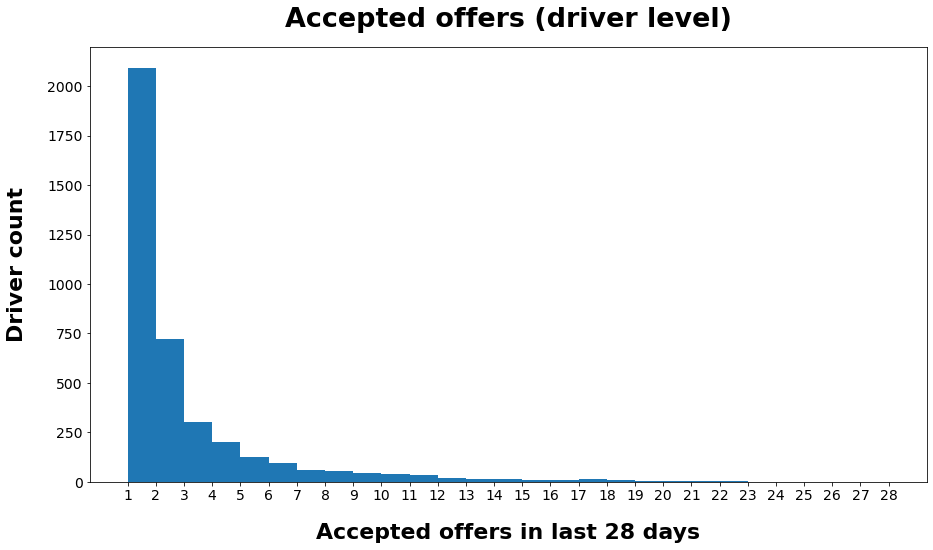

In [153]:
# histogram for accepted offers by specific drivers
plt.figure(figsize=(15,8))
plt.hist(result_2['unique_days_accepting_offers'], bins=np.arange(1, 29))
plt.xticks(np.arange(1, 29), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Accepted offers in last 28 days', fontsize=22, fontweight='bold', labelpad=20)
plt.ylabel('Driver count', fontsize=22, fontweight='bold', labelpad=20)
plt.title('Accepted offers (driver level)', fontsize=27, fontweight='bold',  pad=20)
plt.show()

# Results
Most drivers are only accepting offers 1 day out of 28. This histogram is still not close to representing our qualitative hypothesis. Our qualitative hypothesis is 1 accepted offer per carrier/per week/per driver. So our max value should be 4.
### 1. Are we looking at the wrong users? 
Can we filter this user group in a way that more represents the persona of our qualitative hypothesis? We got our accpeted offers by carriers from the STMS database...Are their offers being accpeted by carriers that would not show up in the STMS database?
### 2. Are we not solving our users problem?  Are they using alternatives?

# Results
Most cariers are only averaging 1 accepted offer per driver out of 28 days. This histogram is still not close to representing our qualitative hypothesis. Our qualitative hypothesis is 1 accepted offer per carrier/per week/per driver. So our max value should be around 4.
### 1. Are we looking at the wrong users? 
Can we filter this user group in a way that more represents the persona of our qualitative hypothesis? We got our accpeted offers by carriers from the STMS database...Are their offers being accpeted by carriers that would not show up in the STMS database?
### 2. Are we not solving our users problem?  Are they using alternatives? 

# Conclusion
- None of our results came close to our qualitative hypothesis,
- Possible reassons for this include incorrect estimation of our qualitiative hypothesis, looking at the wrong users, were not solving our users problems, faulty data, etc.
- I recommend not using this metric for our retention analysis until our results better match our qualitative hypothesis.

# Segment this with paid users vs non-paid users

In [154]:
# creating a table for braintree subscriptions
sql = '''
DROP TABLE IF EXISTS #carrier_with_latest_sub_date
;
SELECT 
carrier_id
,max(created_at) AS last_sub
INTO #carrier_with_latest_sub_date
FROM ctms_db_public.billing_braintreesubscription
WHERE braintree_subscription_status IN ('Active', 'Past Due', 'Pending')
GROUP BY carrier_id
;
SELECT 
#carrier_with_latest_sub_date.carrier_id
,last_sub
,braintree_subscription_status
FROM #carrier_with_latest_sub_date
JOIN ctms_db_public.billing_braintreesubscription
ON #carrier_with_latest_sub_date.carrier_id = billing_braintreesubscription.carrier_id
AND #carrier_with_latest_sub_date.last_sub = billing_braintreesubscription.created_at
WHERE billing_braintreesubscription.braintree_subscription_status IN ('Active', 'Past Due', 'Pending')
;
'''
braintree_subs = pd.read_sql_query(sql, con=engine)
braintree_subs

,carrier_id,last_sub,braintree_subscription_status
0,2978,2016-11-26 09:21:34.937541,Active
1,5164,2017-01-05 22:15:51.921429,Active
2,3109,2016-11-26 09:21:33.283626,Active
3,8280,2017-06-17 15:20:29.527819,Active
4,831,2016-11-26 09:21:32.012823,Active
...,...,...,...
2842,23176,2018-12-26 00:09:35.649648,Active
2843,12809,2019-07-25 18:52:10.562562,Active
2844,42706,2020-11-27 22:14:30.871259,Active
2845,3611,2021-01-12 19:56:01.277712,Active


In [155]:
# joining carriers with braintree table
braintree_with_carriers = braintree_subs.merge(carriers, left_on='carrier_id', right_on='carrier_id')
braintree_with_carriers

,carrier_id,last_sub,braintree_subscription_status,name,carrier_guid
0,2978,2016-11-26 09:21:34.937541,Active,AU-THENTIC INDUSTRIES LLC,1e1366e5-0c67-4019-bd33-e255416c7df7
1,5164,2017-01-05 22:15:51.921429,Active,Capital Trucking LLC,255749b3-8b17-421a-a3ed-353ca3472495
2,3109,2016-11-26 09:21:33.283626,Active,MEI Transportation Services Inc,49cdf08d-56ea-48c6-87d1-91515bf31639
3,8280,2017-06-17 15:20:29.527819,Active,ZPA Incorporated,ba962dbd-1e32-4caf-83e9-59db46983d6a
4,831,2016-11-26 09:21:32.012823,Active,Born Again Hauling,6f3b99e9-ad63-4ca1-abae-44b6c7cd0a14
...,...,...,...,...,...
2842,23176,2018-12-26 00:09:35.649648,Active,TJC HAULING LLC,02f4fd86-dcb9-41d6-b85c-da0683a48d57
2843,12809,2019-07-25 18:52:10.562562,Active,"3N1 Transport, LLC.",69ce2eb9-2a8b-4e44-a56f-5eb6fe87ac53
2844,42706,2020-11-27 22:14:30.871259,Active,GMM TRANSPORTATION LLC,afc1bb93-0ecc-4bf3-a746-5fa8b807f6ab
2845,3611,2021-01-12 19:56:01.277712,Active,Interstate Roadrunner Inc,89108c80-7522-40db-bd22-d614e16116c8


# Paid Users

In [156]:
result_paid_users = (result_2.merge(braintree_with_carriers, left_on='carrier_guid',
                                           right_on='carrier_guid'))

result_paid_users = result_paid_users[['driver_id', 'driver_guid', 'carrier_guid',
                                       'unique_days_accepting_offers']]
result_paid_users['paid_user'] = True
result_paid_users

,driver_id,driver_guid,carrier_guid,unique_days_accepting_offers,paid_user
0,260.0,3f0a1f39-6719-45f4-87f5-59fe4c7d186f,dc44c34d-0ebc-422a-8d21-f2a76eeda9d4,1,True
1,20485.0,23d895d2-2c16-42f6-984b-4e13451a0b01,dc44c34d-0ebc-422a-8d21-f2a76eeda9d4,1,True
2,59684.0,79ed2591-8eb4-4be7-bce4-57c9ab5e1f2d,dc44c34d-0ebc-422a-8d21-f2a76eeda9d4,1,True
3,71573.0,f54ad8ee-073f-4203-b025-f6a9ada5ee6e,dc44c34d-0ebc-422a-8d21-f2a76eeda9d4,4,True
4,428.0,c5bf4b94-0b5a-4d6c-a6be-603ee1f215a4,dff9819a-c1c3-4520-bf8a-ecd23171bd82,2,True
...,...,...,...,...,...
1414,84321.0,da2d0b69-a780-4029-a944-6d355f9103f0,9d3a7bd9-4f68-4f70-acec-ee1b1a9e47ef,1,True
1415,84355.0,31ca2dbb-d7cc-49c9-9391-e642b272fbfe,bf527193-83b9-47b8-b7a5-fddd5a70b5fd,1,True
1416,84468.0,c61c6896-9d01-443c-80fd-a0d5013ab2a3,36ec0378-d4fe-4ffb-a525-fcb7d5b1ad25,1,True
1417,84501.0,303fa8b0-0c10-4705-bd80-4c562c6337b8,cdb5312a-00b3-4e12-aed4-fca75d3c2e3b,1,True


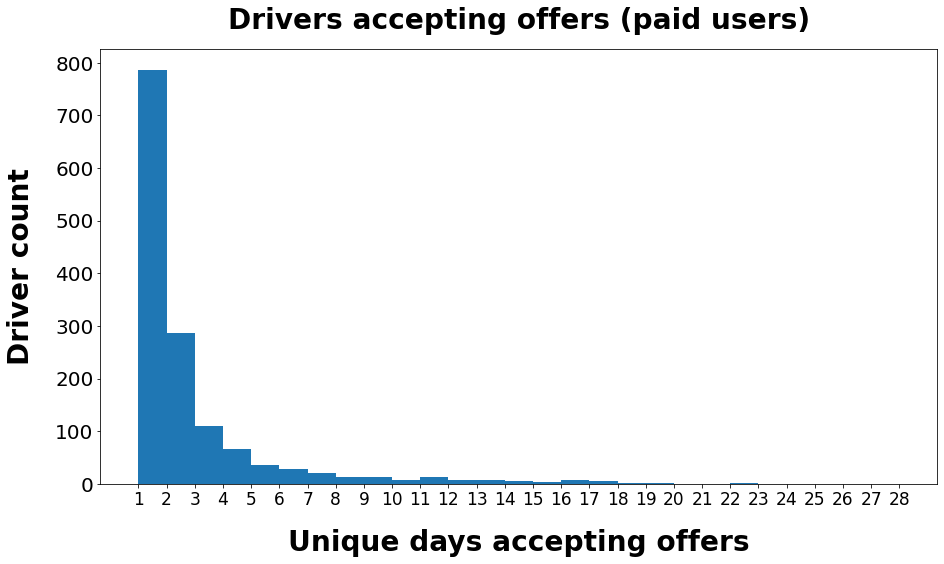

In [168]:
# histogram of unique accepted offers in last 28 days (paid users)
plt.figure(figsize=(15,8))
plt.hist(result_paid_users['unique_days_accepting_offers'], bins=np.arange(1, 29))
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=20)
plt.xlabel('Unique days accepting offers', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('Driver count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('Drivers accepting offers (paid users)', fontsize=28, fontweight='bold', pad=20)
plt.show()

# Free users

In [158]:
result_free_users = (result_2.merge(braintree_with_carriers, how='left', left_on='carrier_guid',
                                           right_on='carrier_guid'))

# Free users will have a missing value under braintree_subscription_status
non_payers = result_free_users['braintree_subscription_status'].isna() == True
# dropping all paid user rows
result_free_users = result_free_users[non_payers]
result_free_users = result_free_users[['driver_id', 'driver_guid', 'carrier_guid',
                                       'unique_days_accepting_offers']]
result_free_users['paid_user'] = False
result_free_users

,driver_id,driver_guid,carrier_guid,unique_days_accepting_offers,paid_user
3,789.0,57a3e202-1bc7-4980-b317-2e40d108cd62,d87b57d0-2fff-4685-942c-d85ab7aafabe,2,False
4,925.0,75f1e441-c3f2-4c22-be1f-a7bac629c21b,bd5d044b-4055-457e-964a-e1a89c2427c8,1,False
7,1875.0,a0f929b0-54bd-4189-a291-35cd95de6718,524c542b-f512-4ed5-8c74-57b22ec6c171,1,False
10,2063.0,68e77323-ed4b-4a78-a896-76ecc2e46cf5,7aa5b9af-378b-4e9f-954f-b4b916524ee5,3,False
14,2279.0,0e952cf8-a8c1-42e8-9081-c7a34e620fb7,6b8d9c0c-d639-4a17-be36-90f37b0e33a9,1,False
...,...,...,...,...,...
3872,84964.0,0f08028c-9f8f-4da0-b514-abea96685381,41fe2ef5-bcb3-4eb7-8fa8-b14779a64107,1,False
3873,84967.0,bee63ab4-8fe7-4af3-874f-ffe393a50d8f,139697be-82a8-4369-97e5-33878bbe54aa,1,False
3874,84972.0,29b6f53b-b034-48a2-8e58-f6d0d7db2950,cbc7cc34-b937-4c05-b154-cd5ac5ea56ca,1,False
3875,84974.0,c744a9f3-c476-40d8-8863-dafffea4eb2e,8a769b02-3b37-4493-b18b-7a973affda9e,1,False


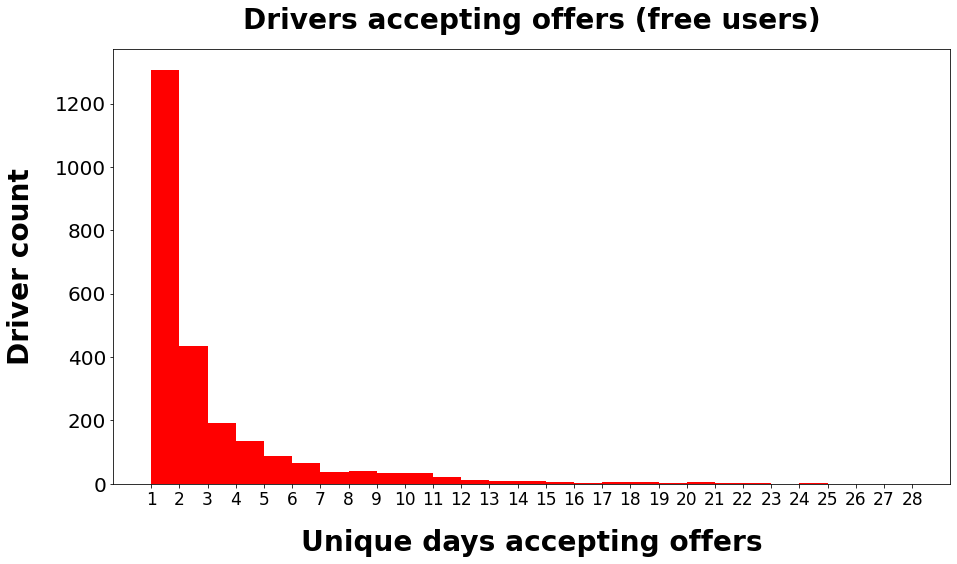

In [169]:
# histogram of unique accepted offers in last 28 days (free users)
plt.figure(figsize=(15,8))
plt.hist(result_free_users['unique_days_accepting_offers'], bins=np.arange(1, 29), color='red')
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=20)
plt.xlabel('Unique days accepting offers', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('Driver count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('Drivers accepting offers (free users)', fontsize=28, fontweight='bold', pad=20)
plt.show()

In [160]:
total_paid_drivers_for_days_active = []

for i in range(1,29):
    paid_active_driver_count = (result_paid_users[result_paid_users['unique_days_accepting_offers'] >= i]
                           .groupby('unique_days_accepting_offers').count()['driver_guid'].sum())
    
    total_paid_drivers_for_days_active.append(paid_active_driver_count)
    


total_free_drivers_for_days_active = []

for i in range(1,29):
    free_active_driver_count = (result_free_users[result_free_users['unique_days_accepting_offers'] >= i]
                           .groupby('unique_days_accepting_offers').count()['driver_guid'].sum())
    
    total_free_drivers_for_days_active.append(free_active_driver_count)

In [161]:
paid_active_drivers = pd.DataFrame()
paid_active_drivers['definition_is_this_many_days_active'] = np.arange(1,29)
paid_active_drivers.set_index('definition_is_this_many_days_active', inplace=True)
paid_active_drivers['total_drivers_at_least_this_active'] = total_paid_drivers_for_days_active
paid_active_drivers['total_percentage_active'] = round(100*paid_active_drivers['total_drivers_at_least_this_active']
                                                       /len(result_paid_users))
paid_active_drivers['total_percentage_dormant'] = 100 - paid_active_drivers['total_percentage_active']


free_active_drivers = pd.DataFrame()
free_active_drivers['definition_is_this_many_days_active'] = np.arange(1,29)
free_active_drivers.set_index('definition_is_this_many_days_active', inplace=True)
free_active_drivers['total_drivers_at_least_this_active'] = total_free_drivers_for_days_active
free_active_drivers['total_percentage_active'] = round(100*free_active_drivers['total_drivers_at_least_this_active']
                                                       /len(result_free_users))
free_active_drivers['total_percentage_dormant'] = 100 - free_active_drivers['total_percentage_active']

In [162]:
def paid_vs_non_paid(paid_metric_definition, non_paid_metric_definition):
    plt.figure(figsize=(13,11))
    plt.subplots_adjust(wspace=.9)
    
    plt.subplot(1,2,1)
    paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[paid_active_drivers.loc[paid_metric_definition, 'total_drivers_at_least_this_active'],
                           (paid_active_drivers.loc[1, 'total_drivers_at_least_this_active'] - 
                            paid_active_drivers.loc[paid_metric_definition, 'total_drivers_at_least_this_active'])],
                        palette='muted')
    for p in paid_graph.patches:
        paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        paid_graph.annotate('{}%'.format(round(100*p.get_height()/paid_active_drivers.loc[1, 'total_drivers_at_least_this_active'])), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    plt.ylabel('Driver Count', fontsize=28, fontweight='bold', labelpad=20)
    title = '''If {} out of 28 days
accepted offer
(paid users)'''.format(paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)

        
    
    plt.subplot(1,2,2)
    non_paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[free_active_drivers.loc[non_paid_metric_definition, 'total_drivers_at_least_this_active'],
                           (free_active_drivers.loc[1, 'total_drivers_at_least_this_active'] - 
                            free_active_drivers.loc[non_paid_metric_definition, 'total_drivers_at_least_this_active'])],
                        palette='muted')
    for p in non_paid_graph.patches:
        non_paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        non_paid_graph.annotate('{}%'.format(round(100*p.get_height()/free_active_drivers.loc[1, 'total_drivers_at_least_this_active'])), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    title = '''If {} out of 28 days
accepted offer
(free users)'''.format(non_paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)
    plt.show()

# Metric = unique days 'accepting offers' (driver level)
# Left side = Paid users
# Right side = Free users
### Our qualitative hypothesis was that a carrier would accept offers 4 out of 28 days.

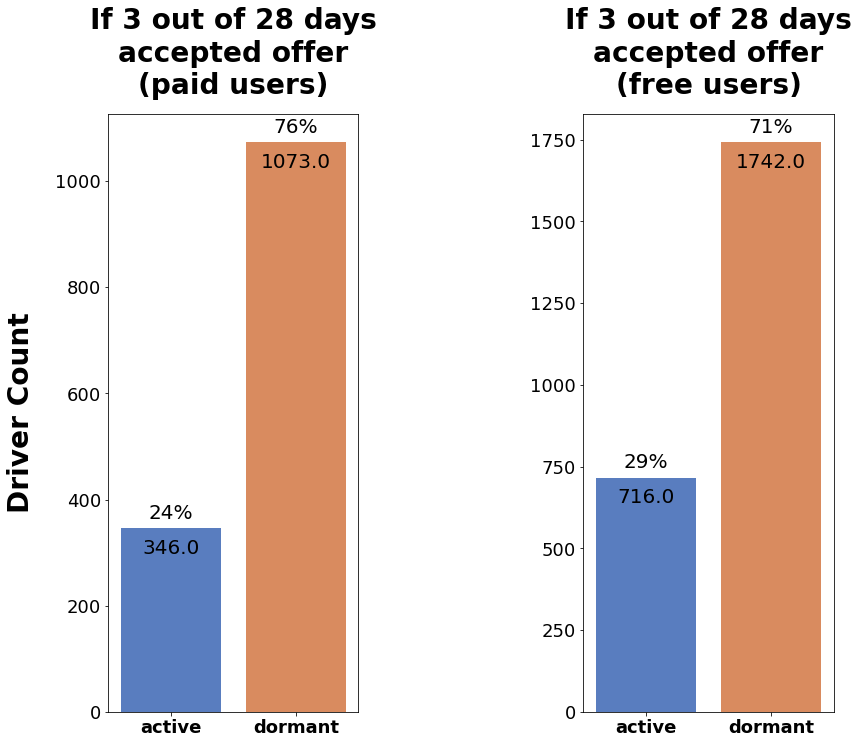

In [165]:
paid_vs_non_paid(3, 3)